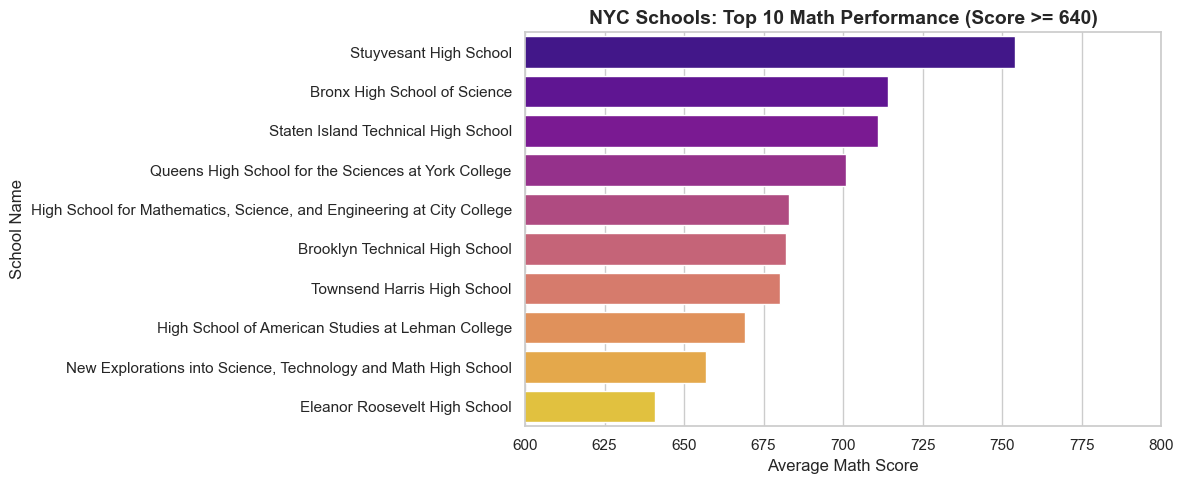

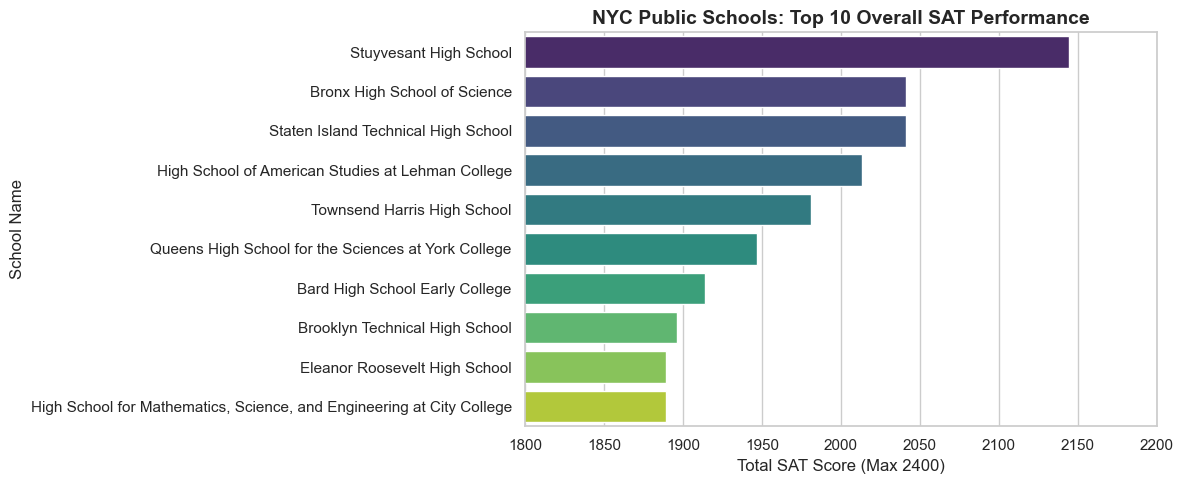

------------------------------
RESULTS SUMMARY
------------------------------
Schools with elite math performance: 10

Borough with highest variability (Inequality):
     borough  num_schools  average_SAT  std_SAT
0  Manhattan           89      1340.13   230.29


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 0. ENSURE DIRECTORY STRUCTURE
# Standardizing folders for a professional portfolio
if not os.path.exists('images'):
    os.makedirs('images')

# 1. DATA LOADING
# Path adjusted to the 'data/' folder as per project standards
schools = pd.read_csv("data/schools.csv")

# 2. ANALYSIS: BEST MATH PERFORMANCE (Question 2)
# Filtering schools with average math scores >= 640 (80% of max score)
best_math_schools = (
    schools[schools["average_math"] >= 640]
    [["school_name", "average_math"]]
    .sort_values("average_math", ascending=False)
)

# 3. ANALYSIS: TOP 10 OVERALL PERFORMANCE
# Calculating total SAT score per school (Math + Reading + Writing)
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]

top_10_schools = (
    schools[["school_name", "total_SAT"]]
    .sort_values("total_SAT", ascending=False)
    .head(10)
)

# 4. ANALYSIS: BOROUGH VARIABILITY (Identifying highest Std Dev)
# Grouping by borough to measure academic consistency
borough_stats = (
    schools.groupby("borough")["total_SAT"]
    .agg(["count", "mean", "std"])
    .round(2)
)

# Identifying the borough with the most inconsistent performance
largest_std_dev = (
    borough_stats[borough_stats["std"] == borough_stats["std"].max()]
    .reset_index()
    .rename(columns={
        "count": "num_schools", 
        "mean": "average_SAT", 
        "std": "std_SAT"
    })
)

# --- VISUALIZATION SECTION ---
sns.set_theme(style="whitegrid")

# Graph A: Top 10 Math Performance
plt.figure(figsize=(12, 5))
sns.barplot(data=best_math_schools.head(10), x='average_math', y='school_name', palette='plasma')
plt.title('NYC Schools: Top 10 Math Performance (Score >= 640)', fontsize=14, fontweight='bold')
plt.xlabel('Average Math Score', fontsize=12)
plt.ylabel('School Name', fontsize=12)
plt.xlim(600, 800)
plt.tight_layout()
plt.savefig('images/nyc_best_math_performance.png')
plt.show()

# Graph B: Top 10 Overall SAT Performance
plt.figure(figsize=(12, 5))
sns.barplot(data=top_10_schools, x='total_SAT', y='school_name', palette='viridis')
plt.title('NYC Public Schools: Top 10 Overall SAT Performance', fontsize=14, fontweight='bold')
plt.xlabel('Total SAT Score (Max 2400)', fontsize=12)
plt.ylabel('School Name', fontsize=12)
plt.xlim(1800, 2200) 
plt.tight_layout()
plt.savefig('images/nyc_top_schools_performance.png')
plt.show()

# --- PRINTING FINAL RESULTS ---
print("-" * 30)
print("RESULTS SUMMARY")
print("-" * 30)
print(f"Schools with elite math performance: {len(best_math_schools)}")
print("\nBorough with highest variability (Inequality):")
print(largest_std_dev) 